In [24]:
% inputs
nn_params = [31 16 15 -29 -13 -8 -7 13 54 -17 -11 -9 16]'/ 10;
il = 1;
hl = 4;
X = [1; 2; 3];
y = [1; 4; 9];
lambda = 0.01;

% command
[j g] = nnCostFunctionLinear(nn_params, il, hl, X, y, lambda)

j =  0.020815
g =

  -0.0131002
  -0.0110085
  -0.0070569
   0.0189212
  -0.0189639
  -0.0192539
  -0.0102291
   0.0344732
   0.0024947
   0.0080624
   0.0021964
   0.0031675
  -0.0064244



*correct results should be
j =  0.020815
g =
    -0.0131002
    -0.0110085
    -0.0070569
     0.0189212
    -0.0189639
    -0.0192539
    -0.0102291
     0.0344732
     0.0024947
     0.0080624
     0.0021964
     0.0031675
    -0.0064244*

In [17]:
pwd

ans = /notebooks/MLCourse/Week5/machine-learning-ex4/ex4


In [357]:
addpath('/notebooks/MLCourse/Week6/machine-learning-ex5/ex5');

load('ex5data1.mat');
m = size(X, 1);

In [358]:
input_layer_size = 1;
hidden_layer_size = 8;
output_layer_size = 1;

initial_Theta1 = randInitializeWeightsCustom(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeightsCustom(hidden_layer_size, output_layer_size);

Theta1 = initial_Theta1;
Theta2 = initial_Theta2;

In [359]:
% Unroll parameters
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];

options = optimset('MaxIter', 200);

%  You should also try different values of lambda
lambda = 0;

% Create "short hand" for the cost function to be minimized
costFunction = @(p) nnCostFunctionLinear(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   X, y, lambda);

% Now, costFunction is a function that takes in only one argument (the
% neural network parameters)
[nn_params, cost] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 output_layer_size, (hidden_layer_size + 1));

Iteration   200 | Cost: 2.458907e-01


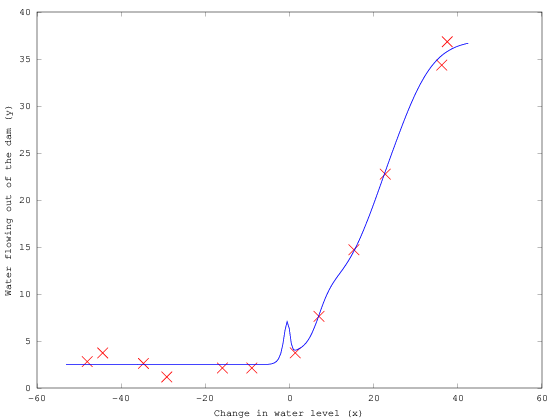

In [360]:
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
plotFitNN(min(X),max(X),Theta1,Theta2);
hold off;

Iteration   200 | Cost: 2.746656e-01


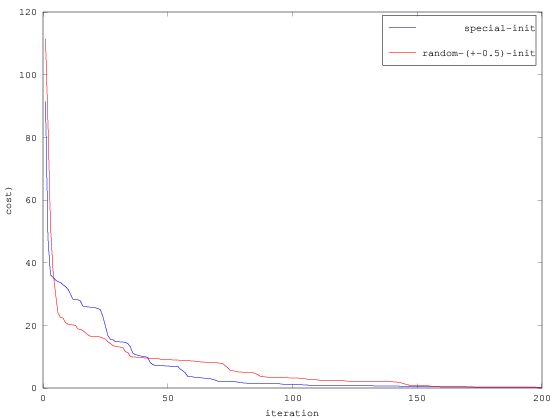

In [361]:
initial_Theta1 = (2*rand(hidden_layer_size, input_layer_size + 1) - 1) * 0.5;
initial_Theta2 = (2*rand(output_layer_size, hidden_layer_size + 1) - 1) * 0.5;
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];
[nn_params, cost2] = fmincg(costFunction, initial_nn_params, options);

plot(1:size(cost), cost, 'LineWidth', 1);
xlabel('iteration');
ylabel('cost)');
hold on;
plot(1:size(cost2), cost2, 'r','LineWidth', 1);
legend('special-init','random-(+-0.5)-init');
hold off;

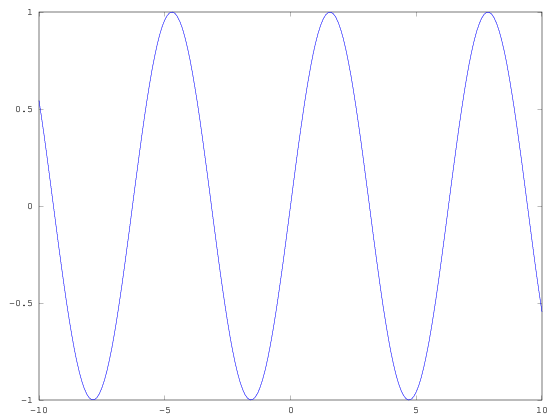

In [362]:
X_sine = (-10:0.1:10)';
y_sine = sin(X_sine);
plot(X_sine,y_sine);

In [484]:
input_layer_size = 1;
hidden_layer_size = 6;
output_layer_size = 1;

initial_Theta1 = randInitializeWeightsCustom(input_layer_size, hidden_layer_size);
initial_Theta2 = randInitializeWeightsCustom(hidden_layer_size, output_layer_size);

Theta1 = initial_Theta1;
Theta2 = initial_Theta2;

In [485]:
initial_nn_params = [initial_Theta1(:) ; initial_Theta2(:)];

lambda = 0;

options = optimset('MaxIter', 1000);

costFunction = @(p) nnCostFunctionLinear(p, ...
                                   input_layer_size, ...
                                   hidden_layer_size, ...
                                   X_sine, y_sine, lambda);
                                   
[nn_params, cost_sine] = fmincg(costFunction, initial_nn_params, options);

% Obtain Theta1 and Theta2 back from nn_params
Theta1 = reshape(nn_params(1:hidden_layer_size * (input_layer_size + 1)), ...
                 hidden_layer_size, (input_layer_size + 1));

Theta2 = reshape(nn_params((1 + (hidden_layer_size * (input_layer_size + 1))):end), ...
                 output_layer_size, (hidden_layer_size + 1));

Iteration  1000 | Cost: 2.325957e-02


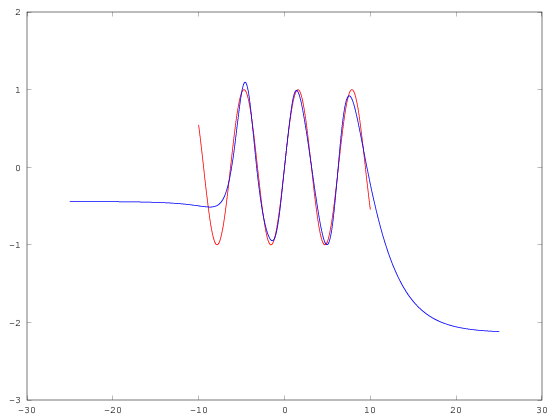

In [486]:
plot(X_sine, y_sine, 'r', 'LineWidth', 2);
plotFitNN(min(X_sine-10),max(X_sine+10),Theta1,Theta2);
hold off;